<a href="https://colab.research.google.com/github/Chonthicha006/MTH361-Python-Coding/blob/main/KerasNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Using Keras Library

Taweesak Samanchuen

เอกสารนี้เป็นตัวอย่างการสร้างแบบจำลอง Image Classification ด้วย Neural Network โดยใช้ไลบรารี่ Keras
1. สามารถทดสอบประสิทธิภาพการ Run ด้วย CPU GPU และ TPU ได้
2. สามารถเพิ่มลดจำนวนของ Hidden Layer ได้ง่าย
Google Colab อยู่แล้ว

[อ่านเพิ่มเติมเรื่อง CPU GPU TPU](https://medium.com/super-ai-engineer/gpu-tpu-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3-%E0%B8%84%E0%B8%A7%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%B2%E0%B8%A3-train-model-%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%81%E0%B8%99%E0%B9%88-1b652666cbbf)

<img src ='https://zitaoshen.rbind.io/project/machine_learning/how-to-build-your-own-neural-net-from-the-scrach/featured.png'>

credit: https://zitaoshen.rbind.io/project/machine_learning/how-to-build-your-own-neural-net-from-the-scrach/


In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

''

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255



11490434/11490434 [==============================] - 0s 0us/step


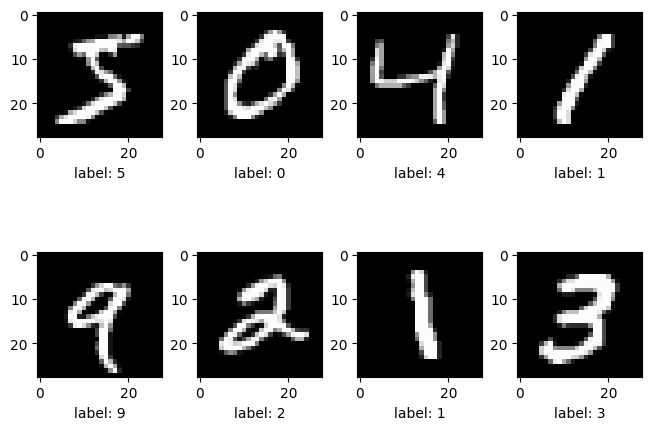

In [ ]:
c_axis = 4 
r_axis = 2
fig, ax = plt.subplots(r_axis, c_axis, constrained_layout = True)
i  = 0 
for row_axis in range(r_axis):
  for column_axis in range(c_axis):
    ax[row_axis,column_axis].imshow(x_train[i].reshape(28,28), cmap='gist_gray')
    ax[row_axis,column_axis].set_xlabel("label: %d" %int(y_train[i]))
    i += 1
plt.show()

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 100
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 3s 4ms/step - loss: 0.3489 - accuracy: 0.9050 - val_loss: 0.1602 - val_accuracy: 0.9580
Epoch 2/10
540/540 [==============================] - 3s 6ms/step - loss: 0.1609 - accuracy: 0.9539 - val_loss: 0.1232 - val_accuracy: 0.9638
Epoch 3/10
540/540 [==============================] - 3s 5ms/step - loss: 0.1162 - accuracy: 0.9661 - val_loss: 0.1027 - val_accuracy: 0.9713
Epoch 4/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0896 - accuracy: 0.9751 - val_loss: 0.0942 - val_accuracy: 0.9728
Epoch 5/10
540/540 [==============================] - 4s 7ms/step - loss: 0.0726 - accuracy: 0.9794 - val_loss: 0.0831 - val_accuracy: 0.9782
Epoch 6/10
540/540 [==============================] - 2s 5ms/step - loss: 0.0591 - accuracy: 0.9832 - val_loss: 0.0815 - val_accuracy: 0.9768
Epoch 7/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0491 - accuracy: 0.9865 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07375719398260117
Test accuracy: 0.9758999943733215
